# Oblig 1 - second try, Sanders


## Depnencies



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

import src.exhaustive_search as exhaustive_search

import src.data as data
import src.population as population
import src.genotype as genotype
import src.hill_climbing as hill

path_to_datafile = "data//european_cities.csv"

In [21]:
## Cities Overview
cities_data = data.data(path_to_datafile)
cities_data.get_overview(24)

[(0, 'Barcelona'),
 (1, 'Belgrade'),
 (2, 'Berlin'),
 (3, 'Brussels'),
 (4, 'Bucharest'),
 (5, 'Budapest'),
 (6, 'Copenhagen'),
 (7, 'Dublin'),
 (8, 'Hamburg'),
 (9, 'Istanbul'),
 (10, 'Kiev'),
 (11, 'London'),
 (12, 'Madrid'),
 (13, 'Milan'),
 (14, 'Moscow'),
 (15, 'Munich'),
 (16, 'Paris'),
 (17, 'Prague'),
 (18, 'Rome'),
 (19, 'Saint Petersburg'),
 (20, 'Sofia'),
 (21, 'Stockholm'),
 (22, 'Vienna'),
 (23, 'Warsaw')]

In [22]:
def fit(model, df): # For calculating socres
    # ip.embed()
    x = 0 # summation variable
    for i in range(len(model)-1):
        x += df.iloc[model[i], model[i+1]]
    x += df.iloc[model[-1], model[0]]
    return x

## Exhaustive Search


In [23]:

for number_of_cities in range(2, 11):
    start = time.time_ns()
    r = exhaustive_search.exhaustiveSearch(number_of_cities)
    stop = time.time_ns()
    print(f"n: {number_of_cities}, Score: {r[1]}, time: {(stop - start) * 1e-9} path: {r[0]}")


n: 2, Score: 3056.26, time: 0.0050008000000000006 path: [0, 1]
n: 3, Score: 4024.99, time: 0.005000500000000001 path: [0, 1, 2]
n: 4, Score: 4241.89, time: 0.0050012 path: [0, 1, 2, 3]
n: 5, Score: 4983.38, time: 0.0050008000000000006 path: [0, 1, 4, 2, 3]
n: 6, Score: 5018.8099999999995, time: 0.0110022 path: [0, 1, 4, 5, 2, 3]
n: 7, Score: 5487.89, time: 0.057012900000000005 path: [0, 1, 4, 5, 2, 6, 3]
n: 8, Score: 6667.49, time: 0.372095 path: [0, 1, 4, 5, 2, 6, 3, 7]
n: 9, Score: 6678.55, time: 3.2977472000000003 path: [0, 1, 4, 5, 2, 6, 8, 3, 7]
n: 10, Score: 7486.3099999999995, time: 33.26054 path: [0, 1, 9, 4, 5, 2, 6, 8, 3, 7]


Since 10 cities take 33 seconds and the time will scale with (N-1)! So for 24 cities will be 33 * (23!/10!)

In [24]:
years = 33*(np.math.factorial(24)/np.math.factorial(10))/60/60/24/365.25
print(years)

178793863938.62833


## Hill Climbing


In [25]:
cities = [2,3,4,5,6,7,8,9,10,24]
scores = {}
mean_scores = {}
best_scores = {}
worst_scores = {}
sds = {}
paths = {}
times = {}
for number_of_cities in cities:
    print(f"Number of cities: {number_of_cities}")
    scores[number_of_cities] =np.zeros(20)
    times[number_of_cities] = 0
    for i in range(20):
        subset_data = cities_data.get_subset(number_of_cities)
        start = time.time_ns()
        path, score = hill.hill(subset_data, fit)
        stop = time.time_ns()

        times[number_of_cities] += stop - start
        scores[number_of_cities][i] = score
    
    mean_scores[number_of_cities] = np.mean(scores[number_of_cities])
    times[number_of_cities] /= 20
    sds[number_of_cities] = np.std(scores[number_of_cities])
    worst_scores[number_of_cities] = np.max(scores[number_of_cities])
    best_scores[number_of_cities] = np.min(scores[number_of_cities]) 

Number of cities: 2
Number of cities: 3
Number of cities: 4
Number of cities: 5
Number of cities: 6
Number of cities: 7
Number of cities: 8
Number of cities: 9
Number of cities: 10
Number of cities: 24


In [26]:
for number_of_cities in cities:
    print(f"Number of cities: {number_of_cities}, \n" +\
     f"    best: {best_scores[number_of_cities]}, worst: {worst_scores[number_of_cities]}, mean: {mean_scores[number_of_cities]} \n" +\
     f"    time: {times[number_of_cities] * 1e-9}, sd: {sds[number_of_cities]}")

Number of cities: 2, 
    best: 3056.26, worst: 3056.26, mean: 3056.2600000000007 
    time: 0.20559791500000002, sd: 4.547473508864641e-13
Number of cities: 3, 
    best: 4024.99, worst: 4024.99, mean: 4024.9900000000007 
    time: 0.29271699, sd: 9.094947017729282e-13
Number of cities: 4, 
    best: 4241.89, worst: 4241.89, mean: 4241.89 
    time: 0.38043679500000005, sd: 0.0
Number of cities: 5, 
    best: 4983.38, worst: 5776.78, mean: 5119.163500000001 
    time: 0.47550787000000005, sd: 267.4897982965891
Number of cities: 6, 
    best: 5018.8099999999995, worst: 6107.72, mean: 5423.139000000001 
    time: 0.5580873350000001, sd: 321.2850053597274
Number of cities: 7, 
    best: 5487.89, worst: 7099.68, mean: 6234.064 
    time: 0.6486919400000001, sd: 458.98200751663444
Number of cities: 8, 
    best: 7287.039999999999, worst: 8747.12, mean: 7931.3544999999995 
    time: 0.74032445, sd: 496.1212876653756
Number of cities: 9, 
    best: 7151.96, worst: 9243.849999999999, mean: 85

## Genetic algorithm

### Constants

In [27]:
path_to_datafile = "data//european_cities.csv" # relative path

number_of_generations = 150# Number of iterations, break condition
start_city = 0 # TODO : implement for start city
subset_sizes = [6, 24]
pop_sizes = np.array([10, 40, 100], dtype="int_")
parent_selection_portion = 0.5
Noffsprings = pop_sizes*2
mutation_p = 0.1
runs = 20 # runs of the algorithm

### Data managment

In [28]:
cities_data = data.data()
cities_data.read_csv(path_to_datafile)
representation = cities_data.get_representation(start=0, N=subset_sizes[1])
subset_data = cities_data.get_subset(subset_sizes[1])
scores = np.zeros(shape=(number_of_generations))

### The algorithm

In [29]:
def genetic_algorithm(cur_population, df,  number_of_generations):
    # Init
    start_time = time.time_ns() # nanoseconds since the epoch
    scores = np.zeros(number_of_generations)
    # -  Evaluate
    res = cur_population.evaluate(df=subset_data, genotype_set="population")
    scores[0] = np.sum(res)/ len(res)
    # -  Loop
    for generation in range(number_of_generations):
        # ip.embed()
    # -  Parent Selection
        cur_population.parent_selection()
    # -  Recombine - Crossover
        cur_population.recombination()
    # -  Mutate
        cur_population.mutate()
    # -  Evaluate
        cur_population.evaluate(df=subset_data, genotype_set="offsprings")
    # -  Survivor Selection
        cur_population.survivor_selection()

    # - Storing data
        res = cur_population.scores
        scores[generation] = np.sum(res)/ len(res)
    # -  endLoop
        
    end_time = time.time_ns()
    time_elapsed = end_time - start_time

    return scores, time_elapsed

### Running 24 cities with 3 different population sizes


In [30]:
# Init
subset_size = 24
subset_data = cities_data.get_subset(subset_size)
representation = cities_data.get_representation(subset_size)

mean_scores = {}
end_scores = {}
sds = {}
times = {}
# Running
for pop_size in pop_sizes:
    print(f"Running for pop_size: {pop_size}")
    mean_scores[pop_size] = np.zeros(number_of_generations)
    end_scores[pop_size] = np.zeros(runs)
    times[pop_size] = 0
    for i in range(runs):
        cur_population = population.Population(
            Genotype = genotype.Genotype,
            representation= representation,
            evaluator = fit,
            population_size = int(pop_size),
            parent_selection_portion = parent_selection_portion,
            number_of_offsprings = int(pop_size)*2,
            mutation_probability = mutation_p
        )
        score, time_elapsed = genetic_algorithm(
            cur_population,
            df = subset_data,
            number_of_generations = number_of_generations
        )
        mean_scores[pop_size] += np.array(score)
        end_scores[pop_size][i] = score[-1]
        times[pop_size] += time_elapsed
    times[pop_size] /= runs
    mean_scores[pop_size] /= number_of_generations
    sds[pop_size] = np.mean(end_scores[pop_size])


Running for pop_size: 10
Running for pop_size: 40
Running for pop_size: 100


### Showing results

pop_size: 10, best end score: 12976.740000000002, worst end score: 16778.16, sd: 15106.28595, time: 0.850392005 
pop_size: 40, best end score: 12903.55, worst end score: 15916.779999999995, sd: 13932.311500000002, time: 3.14426592 
pop_size: 100, best end score: 12325.93, worst end score: 15032.239999999993, sd: 13328.023000000001, time: 7.63350532 


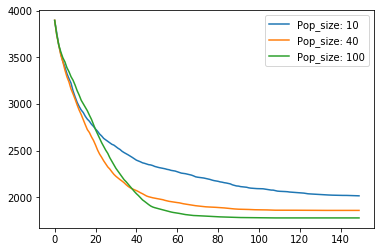

In [31]:
x = np.arange(0, number_of_generations)
for pop_size in pop_sizes:
    print(f"pop_size: {pop_size}, best end score: {np.min(end_scores[pop_size])}, worst end score: {np.max(end_scores[pop_size])}, sd: {sds[pop_size]}, time: {times[pop_size]*1e-9} ")
    plt.plot(x, mean_scores[pop_size], label=f"Pop_size: {pop_size}")
plt.legend()
plt.show()

In the in my GA the number of inspected tours is number og generations * population size. So for population size 10 it and number of generations is 100 then the amount of tours inspected is 10 * 100 = 1000. For 24 cities this is an incredible small number comaring to (24-1)! So it seems quite effective eaven tho it is not garanteed to be the best solution.

### Testing if the GA finds the best path

In [32]:

for number_of_cities in range(2,11):
    representation = cities_data.get_representation(number_of_cities)
    subset_data = cities_data.get_subset(number_of_cities)
    cur_population = population.Population(
        Genotype = genotype.Genotype,
        representation= representation,
        evaluator = fit,
        population_size = 100,
        parent_selection_portion = parent_selection_portion,
        number_of_offsprings = 200,
        mutation_probability = mutation_p
    )
    score, time_elapsed = genetic_algorithm(
        cur_population,
        df = subset_data,
        number_of_generations = number_of_generations
    )
    print(f"Scores for {number_of_cities} cities: {score[-1]}")


Scores for 2 cities: 3056.260000000001
Scores for 3 cities: 4024.9899999999984
Scores for 4 cities: 4241.89
Scores for 5 cities: 4983.379999999999
Scores for 6 cities: 5018.809999999999
Scores for 7 cities: 5487.890000000001
Scores for 8 cities: 6667.49
Scores for 9 cities: 6678.550000000004
Scores for 10 cities: 7486.310000000001


We can see that with large iterations we have mostly found the best paths